In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

[0 2]


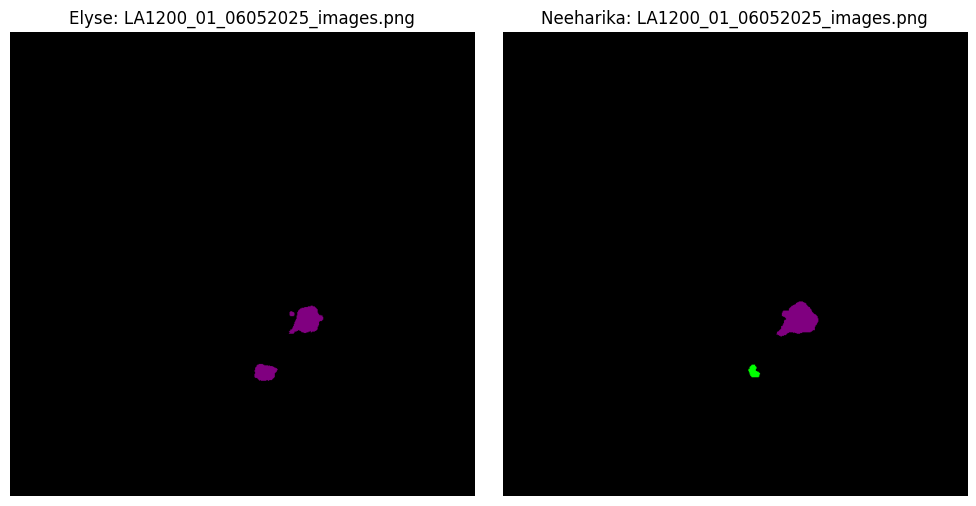

[0 2]


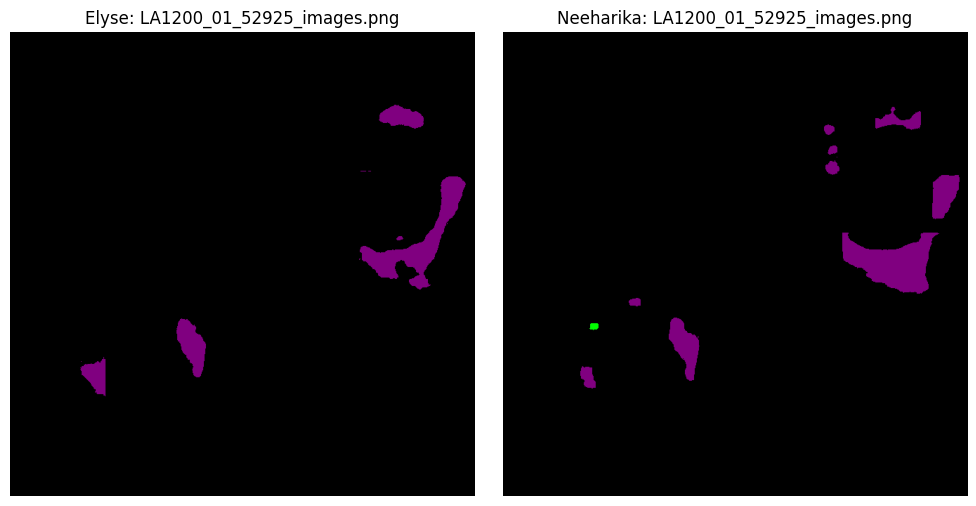

[0 2]


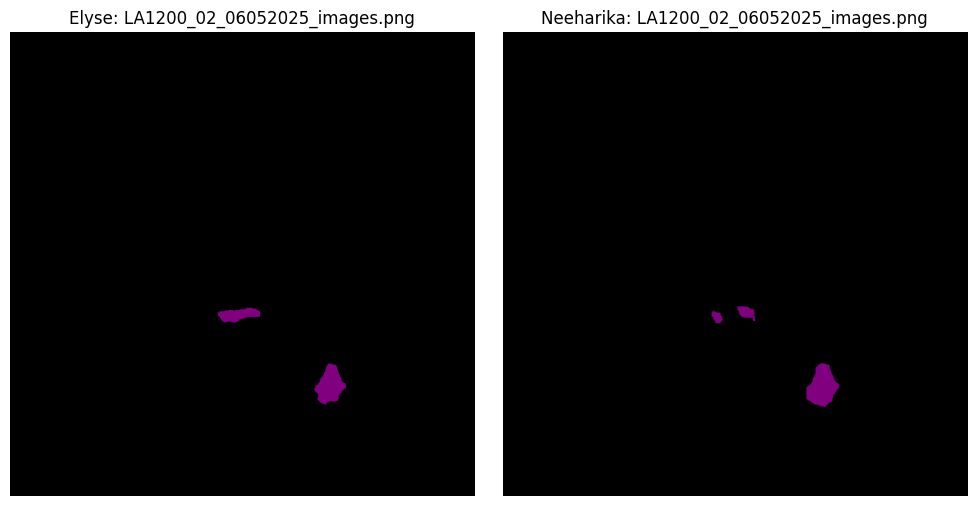

[0 2]


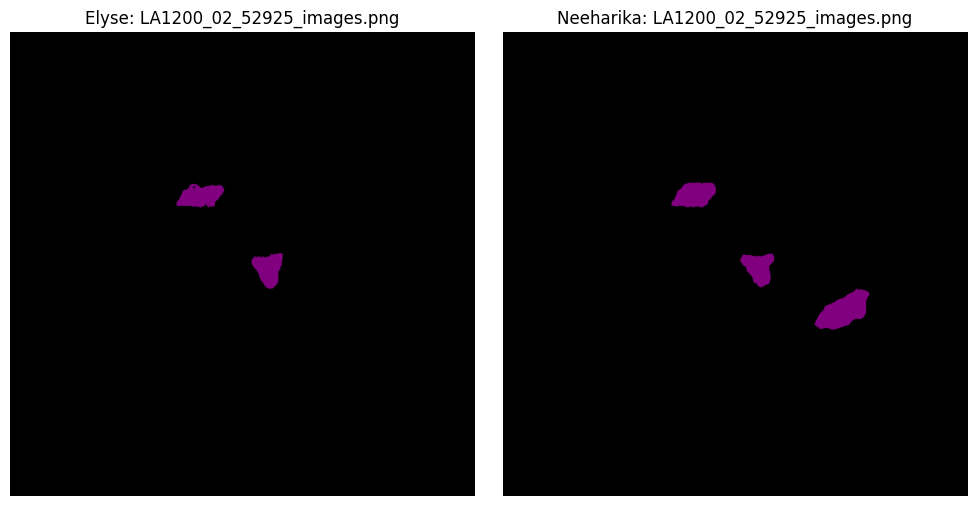

[0 1 2]


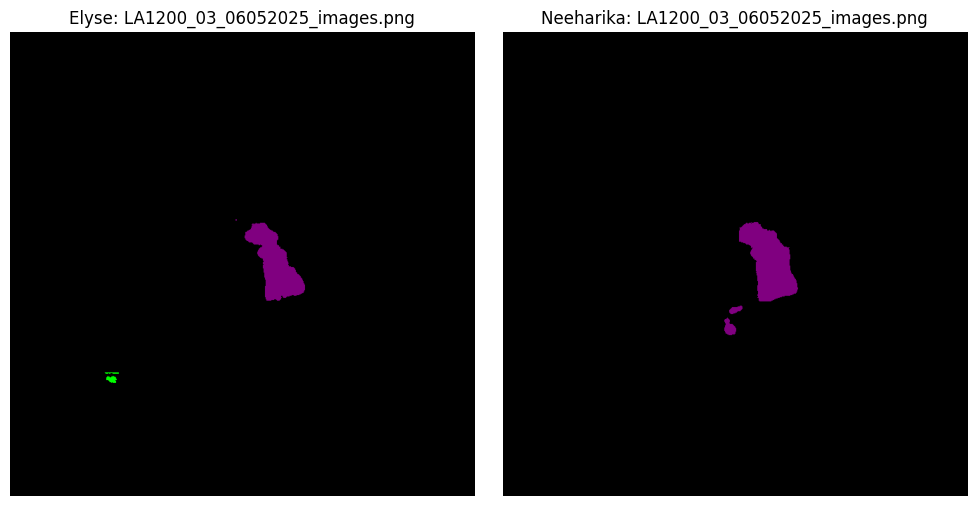

[0 2]


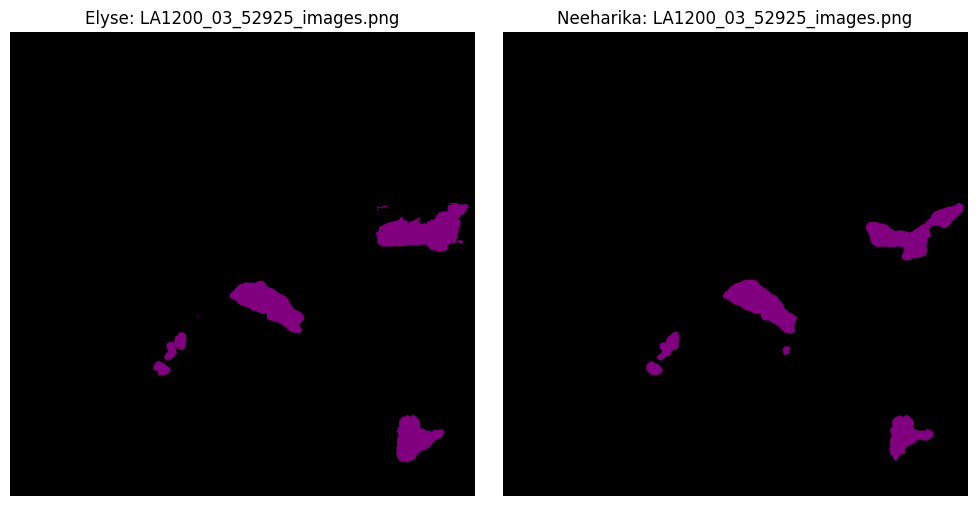

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/masks\\LA1200_04_06052025_images.png'

In [13]:
# Path to folders
folder_path = "data/train/masks-elyse"
other_folder_path = "data/train/masks"

# Get all image files
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]

for filename in image_files:
    image_path = os.path.join(folder_path, filename)
    image_path_other = os.path.join(other_folder_path, filename)

    # Load masks as grayscale
    mask = np.array(Image.open(image_path).convert("L"))
    mask_other = np.array(Image.open(image_path_other).convert("L"))

    test = np.array(Image.open(image_path))
    print(np.unique(mask))



    img = cv2.imread(image_path)
    img_other = cv2.imread(image_path_other)
    #print(img.shape, img_other.shape)
    # Create color-coded versions
    color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    color_mask_other = np.zeros((*mask_other.shape, 3), dtype=np.uint8)

    # Elyse
    color_mask[mask == 1] = [0, 255, 0]        # Green
    color_mask[mask == 2] = [128, 0, 128]      # Purple

    # Neeharika
    color_mask_other[mask_other == 1] = [0, 255, 0]
    color_mask_other[mask_other == 2] = [128, 0, 128]

    # Plot side-by-side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(color_mask)
    plt.title(f"Elyse: {filename}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(color_mask_other)
    plt.title(f"Neeharika: {filename}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()